In [1]:
from google.colab import files  
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [3]:
dataset = pd.read_csv("heart.csv")
print(dataset)
print(dataset.shape)
print(dataset.info())

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

In [4]:
print(dataset[dataset['target']==1].count())

age         165
sex         165
cp          165
trestbps    165
chol        165
fbs         165
restecg     165
thalach     165
exang       165
oldpeak     165
slope       165
ca          165
thal        165
target      165
dtype: int64


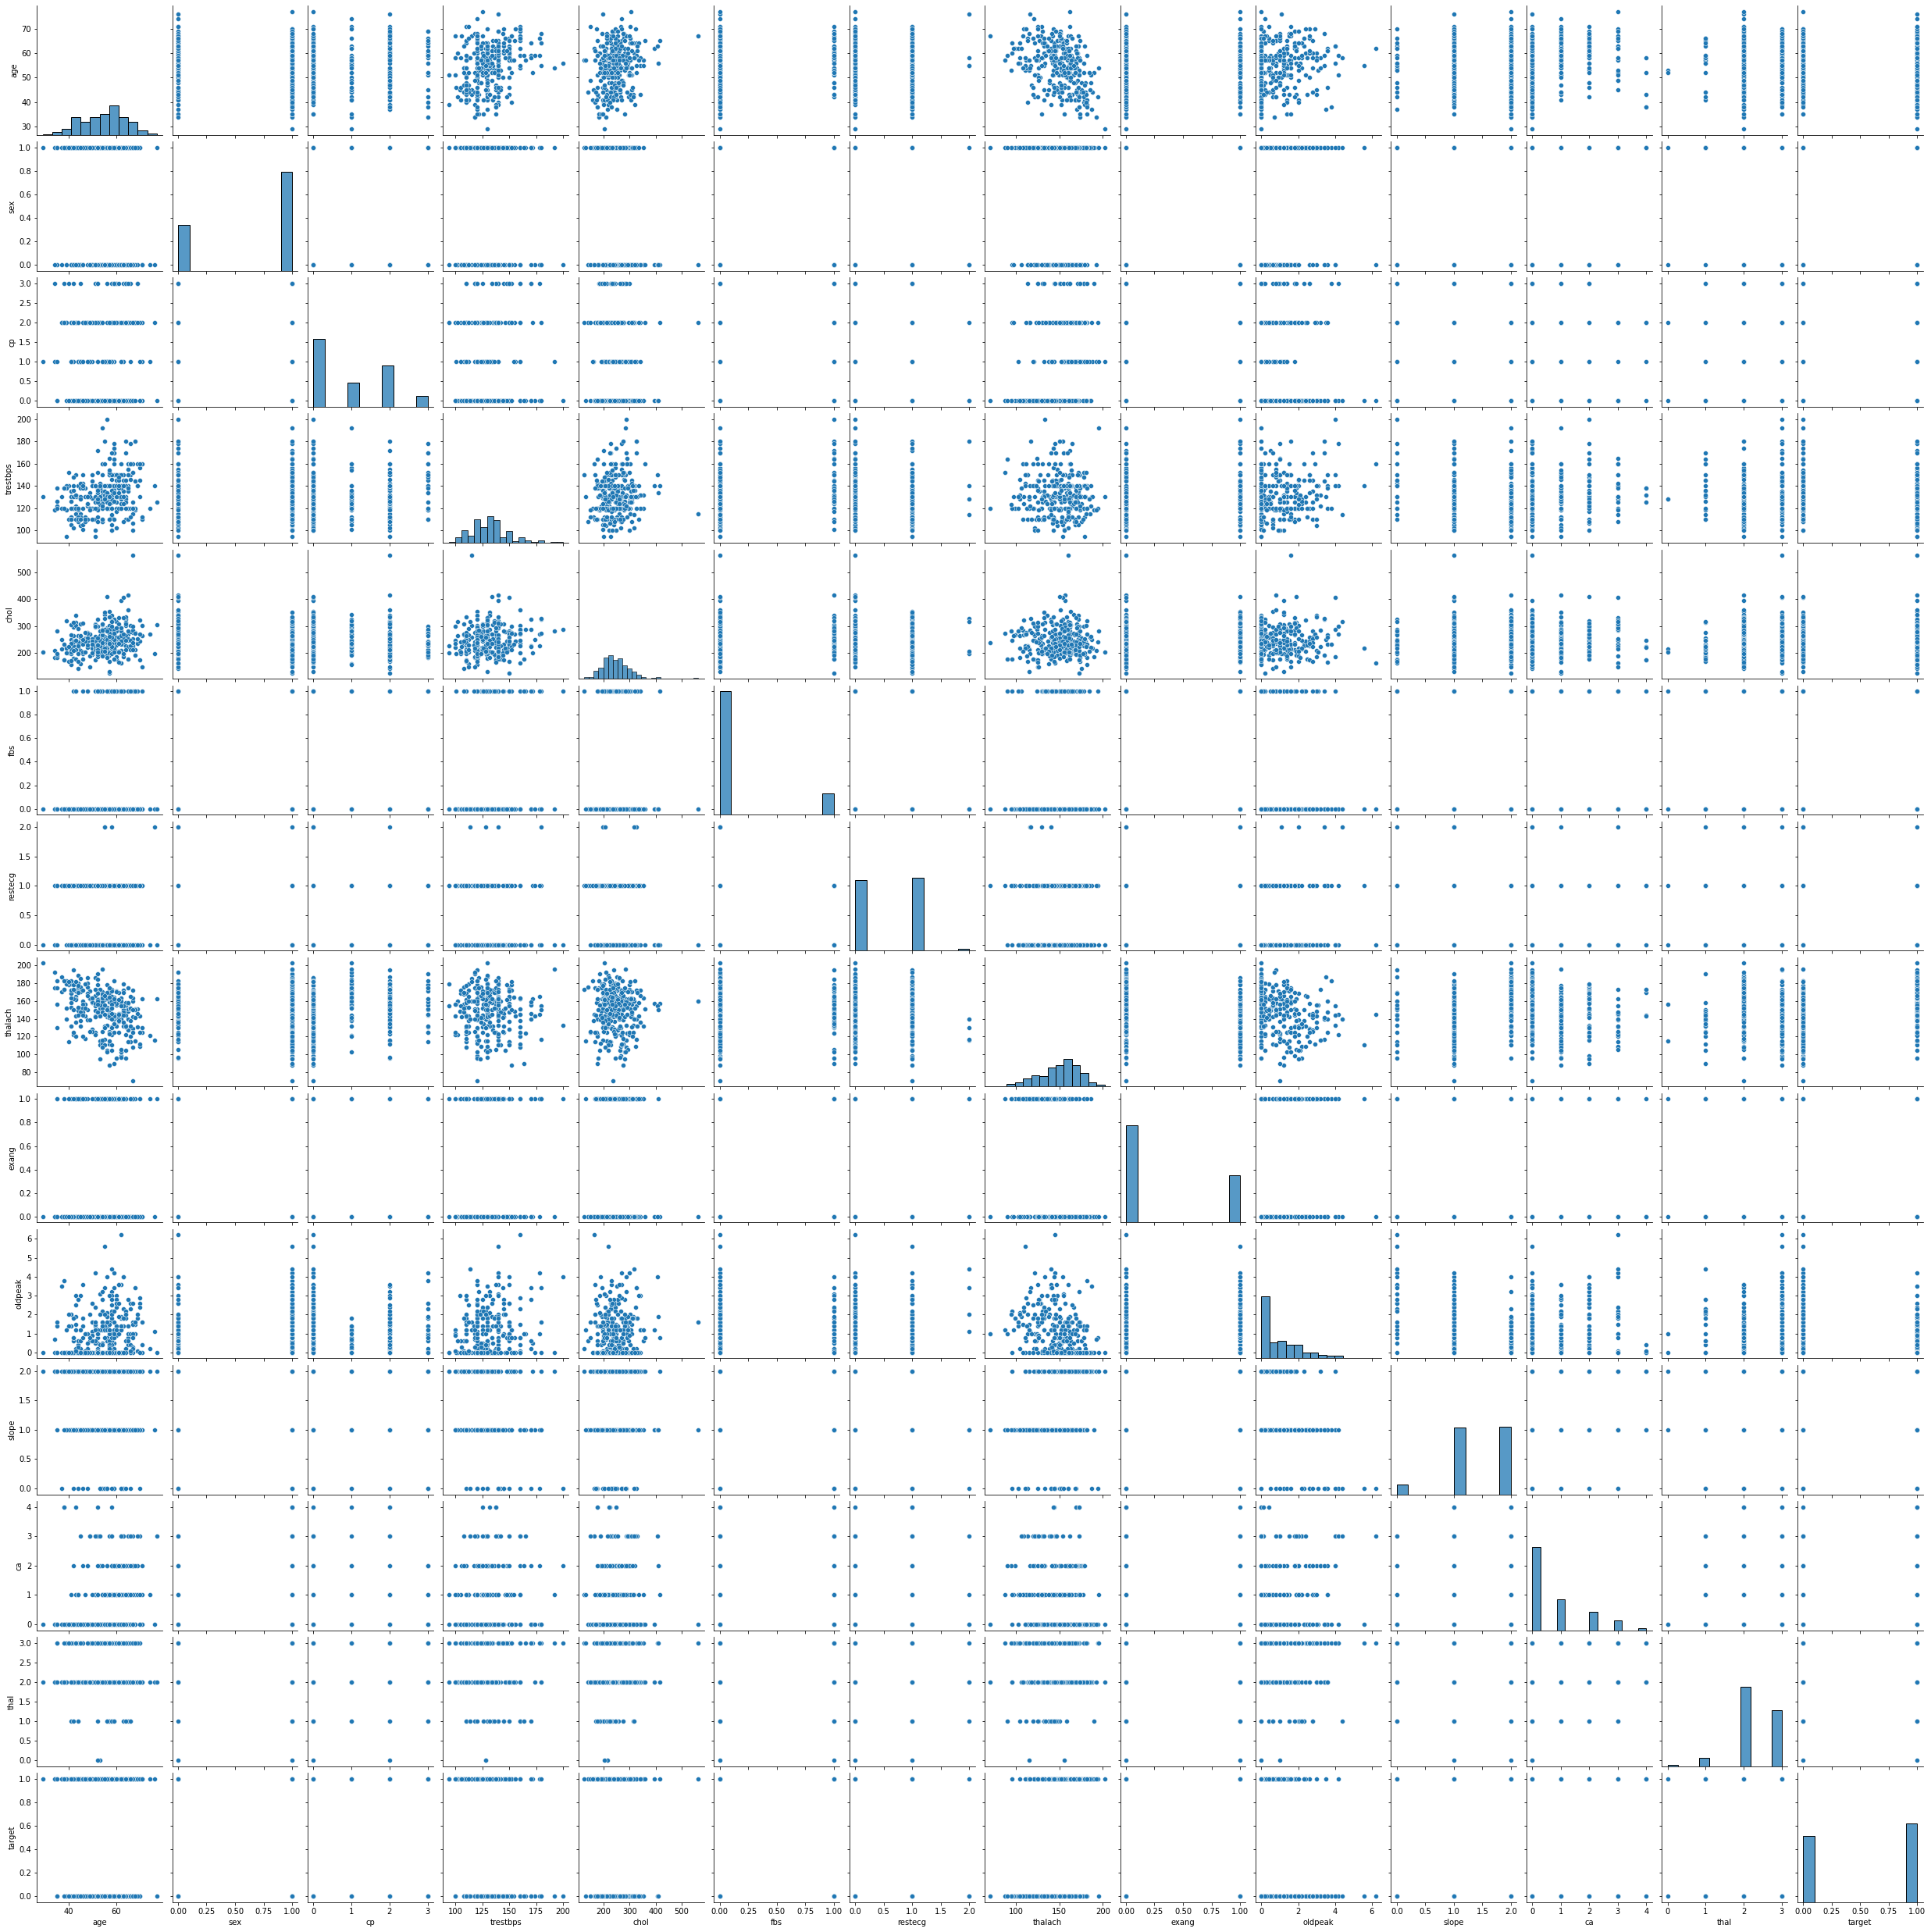

In [5]:
sns.pairplot(dataset)

               age       sex        cp  ...        ca      thal    target
age       1.000000 -0.098447 -0.068653  ...  0.276326  0.068001 -0.225439
sex      -0.098447  1.000000 -0.049353  ...  0.118261  0.210041 -0.280937
cp       -0.068653 -0.049353  1.000000  ... -0.181053 -0.161736  0.433798
trestbps  0.279351 -0.056769  0.047608  ...  0.101389  0.062210 -0.144931
chol      0.213678 -0.197912 -0.076904  ...  0.070511  0.098803 -0.085239
fbs       0.121308  0.045032  0.094444  ...  0.137979 -0.032019 -0.028046
restecg  -0.116211 -0.058196  0.044421  ... -0.072042 -0.011981  0.137230
thalach  -0.398522 -0.044020  0.295762  ... -0.213177 -0.096439  0.421741
exang     0.096801  0.141664 -0.394280  ...  0.115739  0.206754 -0.436757
oldpeak   0.210013  0.096093 -0.149230  ...  0.222682  0.210244 -0.430696
slope    -0.168814 -0.030711  0.119717  ... -0.080155 -0.104764  0.345877
ca        0.276326  0.118261 -0.181053  ...  1.000000  0.151832 -0.391724
thal      0.068001  0.210041 -0.161736

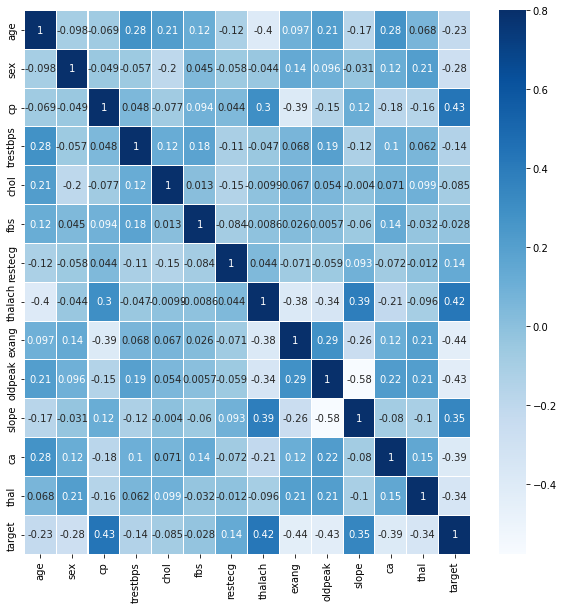

In [7]:
df = dataset.corr()
print(df)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df,linewidths=0.1,  cmap = plt.cm.Blues, linecolor = 'White',ax=ax, vmax=0.8, annot=True)

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0])

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [13]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
predictors = dataset.drop("target",axis=1)
target = dataset["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


In [16]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(X_train.astype(float))
ms.fit(X_test.astype(float))
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [18]:
from sklearn import linear_model
regress = linear_model.LogisticRegression(solver='lbfgs')
regress.fit(X_train, Y_train)
print("Coefficients: ", regress.coef_)
print("Intercept: ", regress.intercept_)

Coefficients:  [[-0.63758375 -1.41740731  1.71006361 -0.66204378 -0.51460831 -0.22260918
   0.2360389   1.31258259 -1.04987001 -1.61781082  0.7287191  -2.28068175
  -1.2917183 ]]
Intercept:  [2.02501636]


In [19]:
y_predicted = regress.predict(X_test)
test_y = np.array(Y_test)
c=0
print(y_predicted)
for i in range(len(X_test)):
  if(test_y[i]!=y_predicted[i]):
    c+=1

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [20]:
print("Number of mislabeled points out of total {0} points: {1} ".format(X_test.shape[0], c))

Number of mislabeled points out of total 61 points: 9 


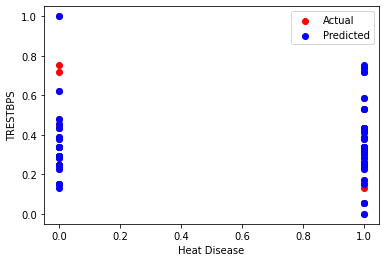

In [21]:
plt.scatter(test_y, [i[3] for i in X_test], color = "red", label="Actual")
plt.scatter(y_predicted, [i[3] for i in X_test],color="blue", label="Predicted")
plt.xlabel("Heat Disease")
plt.ylabel("TRESTBPS")
plt.legend()
plt.show()

In [22]:
score_lr = metrics.accuracy_score(Y_test, y_predicted)
print("Accuracy: ", score_lr)
print("Confusion Matrix\n", metrics.confusion_matrix(Y_test, y_predicted))
print(metrics.classification_report(Y_test,y_predicted))

Accuracy:  0.8524590163934426
Confusion Matrix
 [[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



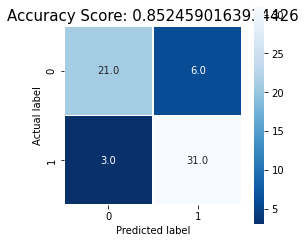

In [23]:
plt.figure(figsize=(4,4))
sns.heatmap(metrics.confusion_matrix(Y_test,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(Y_test, y_predicted))
plt.title(all_sample_title, size = 15);

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from IPython.display import Image
import pydotplus
tree = DecisionTreeClassifier(criterion='entropy')
# tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
# tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50)
# tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

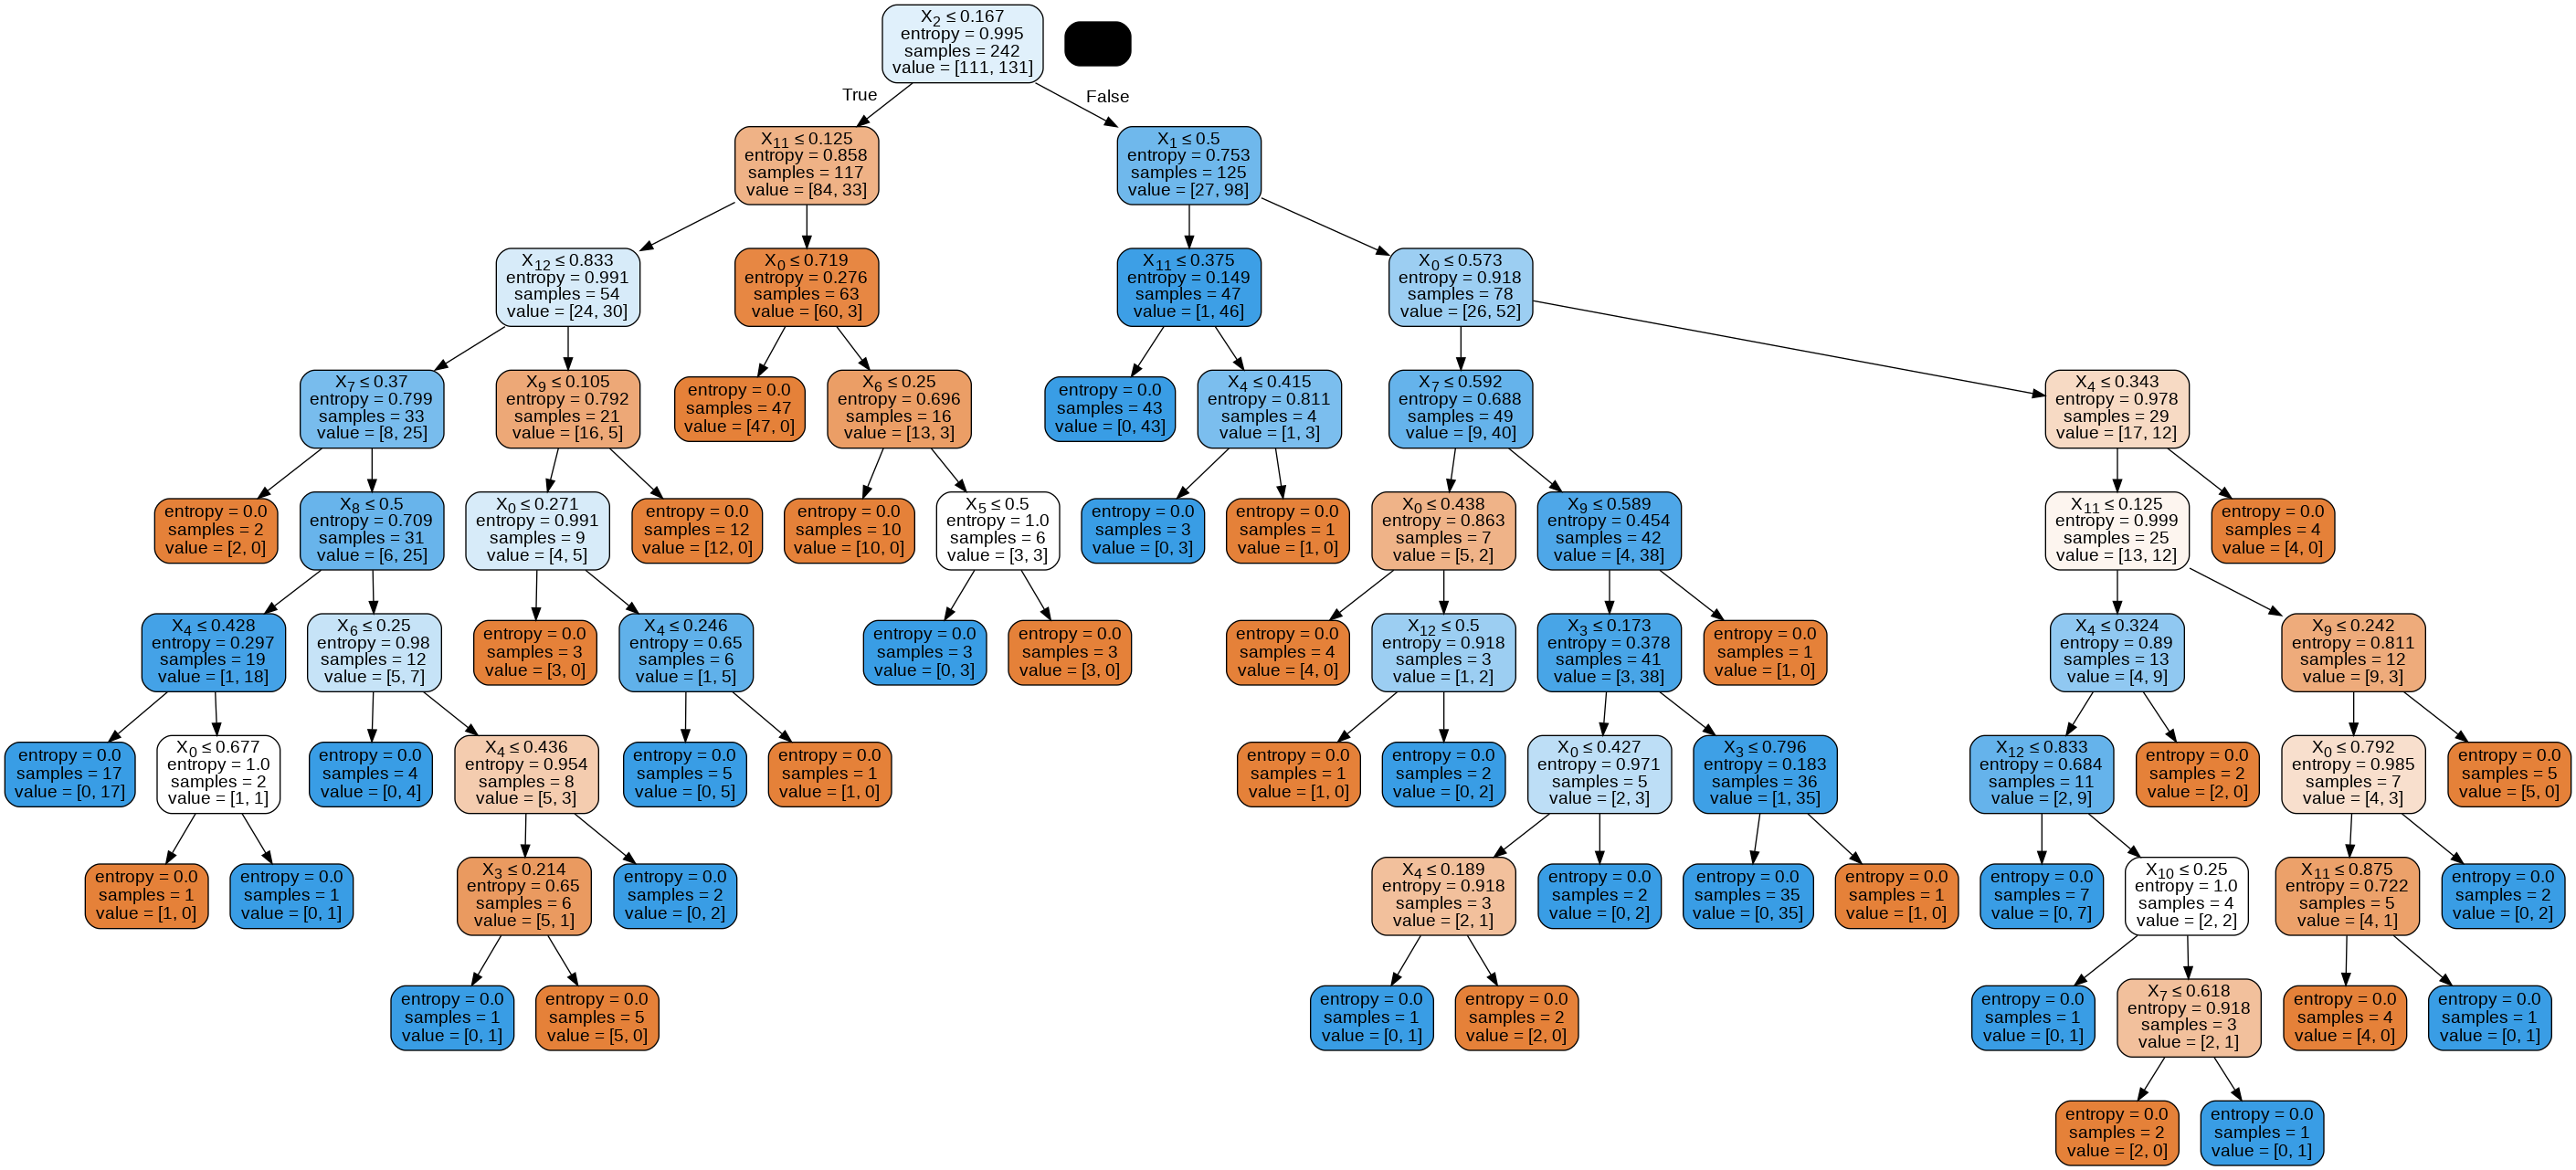

In [34]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded = True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=1500, height=800)

In [35]:
predict = tree.predict(X_test)
test_y = np.array(Y_test)
c=0
print(predict)
for i in range(len(X_test)):
  if(test_y[i]!=predict[i]):
    c+=1

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0]


In [36]:
print("Number of mislabeled points out of total {0} points: {1} ".format(X_test.shape[0], c))

Number of mislabeled points out of total 61 points: 15 


In [37]:
score_dt = metrics.accuracy_score(Y_test, predict)
print("Accuracy: ", score_dt)
print("Confusion Matrix\n", metrics.confusion_matrix(Y_test, predict))
print(metrics.classification_report(Y_test,predict))

Accuracy:  0.7540983606557377
Confusion Matrix
 [[23  4]
 [11 23]]
              precision    recall  f1-score   support

           0       0.68      0.85      0.75        27
           1       0.85      0.68      0.75        34

   micro avg       0.75      0.75      0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



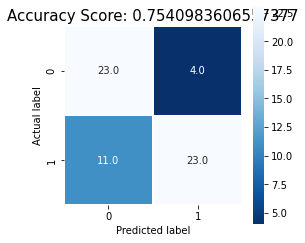

In [29]:
plt.figure(figsize=(4,4))
sns.heatmap(metrics.confusion_matrix(Y_test,predict), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(Y_test, predict))
plt.title(all_sample_title, size = 15);

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
y_predict = nb.predict(X_test)
print(y_predict)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0]


In [41]:
c=0
for i in range(len(X_test)):
  if(test_y[i]!=y_predict[i]):
    c+=1

In [42]:
print("Number of mislabeled points out of total {0} points: {1} ".format(X_test.shape[0], c))

Number of mislabeled points out of total 61 points: 14 


In [43]:
score_nb = metrics.accuracy_score(Y_test, y_predict)
print("Accuracy: ", score_nb)
print("Confusion Matrix\n", metrics.confusion_matrix(Y_test, y_predict))
print(metrics.classification_report(Y_test,y_predict))

Accuracy:  0.7704918032786885
Confusion Matrix
 [[22  5]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.83      0.74      0.78        34

   micro avg       0.77      0.77      0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



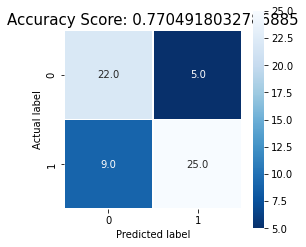

In [44]:
plt.figure(figsize=(4,4))
sns.heatmap(metrics.confusion_matrix(Y_test,y_predict), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(Y_test, y_predict))
plt.title(all_sample_title, size = 15);

In [45]:
scores = [score_lr,score_nb,score_dt]
algorithms = ["Logistic Regression","Naive Bayes","Decision Tree"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 0.8524590163934426 %
The accuracy score achieved using Naive Bayes is: 0.7704918032786885 %
The accuracy score achieved using Decision Tree is: 0.7540983606557377 %


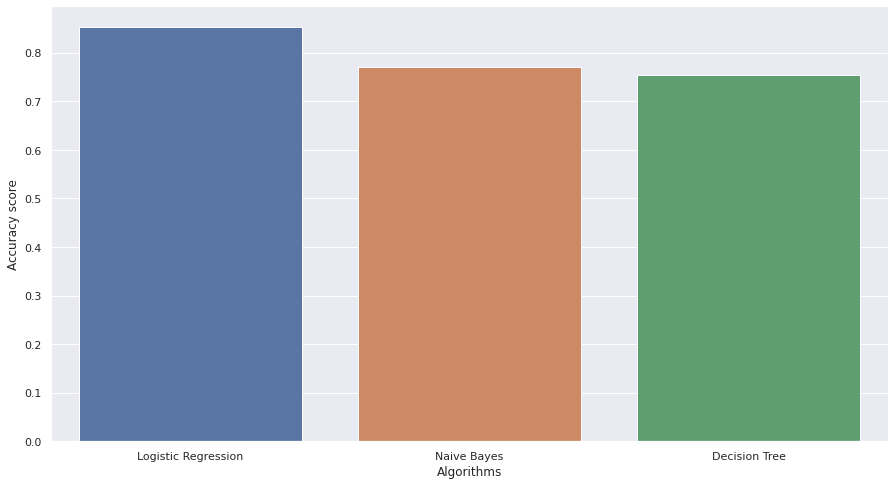

In [46]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)